In [1]:
# data analysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pyampute.exploration.md_patterns import mdPatterns

In [2]:
credit_risk_dataset = pd.read_csv(
    filepath_or_buffer = "../data/interim/credit_risk_dataset_prepped.csv"
)

In [3]:
credit_risk_dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,False,0.10,False,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,True,0.57,False,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,True,0.53,False,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,True,0.55,True,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,True,0.25,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32404,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,False,0.11,False,30
32405,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,False,0.15,False,19
32406,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,True,0.46,False,28
32407,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,False,0.10,False,26


### Missing Values

#### Re-Identifying Missing Values

In [4]:
credit_risk_dataset.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3094
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
credit_risk_dataset.isna().sum()/len(credit_risk_dataset)

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.027369
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.095467
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

##### Features that contain NaNs are missing only less than 10% of their total data - no cause for dropping columns (albeit this step would have been performed in the EDA section)

In [6]:
credit_risk_dataset.isna().all(axis=1).sum()

0

In [7]:
credit_risk_dataset.isna().all(axis=0).sum()

0

##### There aren't any completely empty row or columns

In [8]:
credit_risk_dataset[credit_risk_dataset.isna().any(axis=1)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
38,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,True,0.42,False,4
49,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,True,0.38,True,4
56,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,False,0.13,False,4
58,24,12000,OWN,2.0,VENTURE,E,1750,NaN,False,0.15,True,3
61,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,True,0.04,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32375,53,4888,OWN,0.0,VENTURE,C,1400,NaN,True,0.29,True,28
32380,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,False,0.22,True,19
32381,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,False,0.25,False,28
32397,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,False,0.13,False,23


### Missing Value Validations

#### MCAR

c:\Users\billy\anaconda3\envs\credit_risk_modeling\Lib\site-packages\pyampute\exploration\md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


<Figure size 2000x600 with 0 Axes>

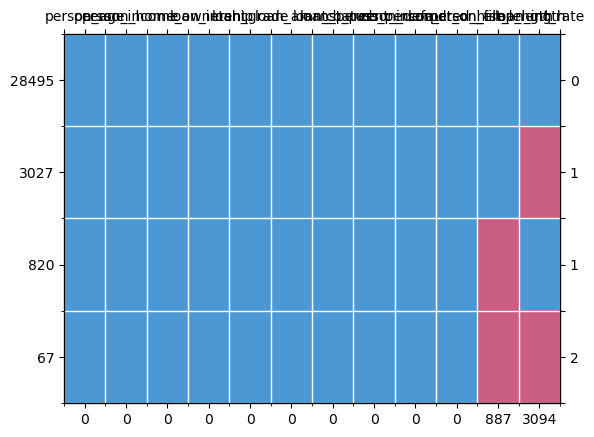

                         row_count  person_age  person_income  \
rows_no_missing              28495           1              1   
1                             3027           1              1   
2                              820           1              1   
3                               67           1              1   
n_missing_values_per_col                     0              0   

                          person_home_ownership  loan_intent  loan_grade  \
rows_no_missing                               1            1           1   
1                                             1            1           1   
2                                             1            1           1   
3                                             1            1           1   
n_missing_values_per_col                      0            0           0   

                          loan_amnt  loan_status  loan_percent_income  \
rows_no_missing                   1            1                    1   
1     

In [ ]:
mdp = mdPatterns()
patterns = mdp.get_patterns(credit_risk_dataset)
print(patterns)